In [2]:
import requests
dataset_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
file_name = "house_prices.csv"
response = requests.get(dataset_url)
with open(file_name, "wb") as file:
    file.write(response.content)

print(f"Dataset downloaded and saved as {file_name}")

Dataset downloaded and saved as house_prices.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("house_prices.csv")  

print("Dataset Info:")
print(df.info())  
print("\nSummary Statistics:")
print(df.describe()) 

df.fillna(df.select_dtypes(include=['number']).median(numeric_only=True), inplace=True)

df["Price_per_sqft"] = df["Price"] / df["Sqft"] 
df["Age_of_House"] = 2025 - df["YearBuilt"]  

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Sqft"], y=df["Price"], alpha=0.6)
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.title("House Price vs Square Footage")
plt.show()

print("\nModified DataFrame with New Features:")
print(df.head())  


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Summary Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081  

KeyError: 'Price'

In [7]:
import pandas as pd

df = pd.read_csv("house_prices.csv")  

if "price" in df.columns and "sqft_living" in df.columns:
    df["price_per_sqft"] = df["price"] / df["sqft_living"]
else:
    print("Error: Required columns ('price', 'sqft_living') not found in dataset.")

print(df.head())

df.to_csv("updated_house_prices.csv", index=False)
print("Updated DataFrame saved successfully!")


Error: Required columns ('price', 'sqft_living') not found in dataset.
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Upda

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("house_prices.csv")  

print("Dataset Info:")
print(df.info())  
print("\nSummary Statistics:")
print(df.describe()) 

df.fillna(df.select_dtypes(include=['number']).median(numeric_only=True), inplace=True)

df["Price_per_sqft"] = df["Price"] / df["Sqft"] 
df["Age_of_House"] = 2025 - df["YearBuilt"]  

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Sqft"], y=df["Price"], alpha=0.6)
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.title("House Price vs Square Footage")
plt.show()

print("\nModified DataFrame with New Features:")
print(df.head())  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Summary Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081  

KeyError: 'Price'

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_rows = 1000
square_feet = np.random.randint(500, 5000, num_rows)  # Random square footage
price = square_feet * np.random.uniform(50, 300, num_rows)  # Price based on per sqft rate
year_built = np.random.randint(1900, 2025, num_rows)  # Random year of construction
year_renovated = np.random.choice([0, 2000, 2010, 2015, 2020], num_rows)  # Some houses renovated
location = np.random.choice(["NEAR BAY", "INLAND", "CITY CENTER", "SUBURB"], num_rows)  # Categorical location

# Create DataFrame
df = pd.DataFrame({
    'Square_Feet': square_feet,
    'Price': price,
    'Year_Built': year_built,
    'Year_Renovated': year_renovated,
    'Location': location
})

# Feature Engineering
df['Price_per_sqft'] = df['Price'] / df['Square_Feet']
df['Age_of_House'] = 2025 - df['Year_Built']
df['Renovation_Status'] = np.where(df['Year_Renovated'] > 0, 'Renovated', 'Not Renovated')

# Save dataset to CSV
df.to_csv('house_prices.csv', index=False)

# Display first few rows
print(df.head())


   Square_Feet          Price  Year_Built  Year_Renovated     Location  \
0         1360  232824.644831        1944            2015  CITY CENTER   
1         4272  760904.776482        1919            2020       SUBURB   
2         3592  845634.875917        1916            2020  CITY CENTER   
3          966  217071.273538        2018               0     NEAR BAY   
4         4926  742040.378690        1970               0     NEAR BAY   

   Price_per_sqft  Age_of_House Renovation_Status  
0      171.194592            81         Renovated  
1      178.114414           106         Renovated  
2      235.421736           109         Renovated  
3      224.711463             7     Not Renovated  
4      150.637511            55     Not Renovated  


Summary Statistics:
              Price  Square_Feet
count  1.000000e+03  1000.000000
mean   4.903886e+05  2815.422000
std    3.105007e+05  1255.514921
min    2.994518e+04   503.000000
25%    2.480914e+05  1749.500000
50%    4.201604e+05  2862.500000
75%    6.829900e+05  3849.500000
max    1.453481e+06  4999.000000


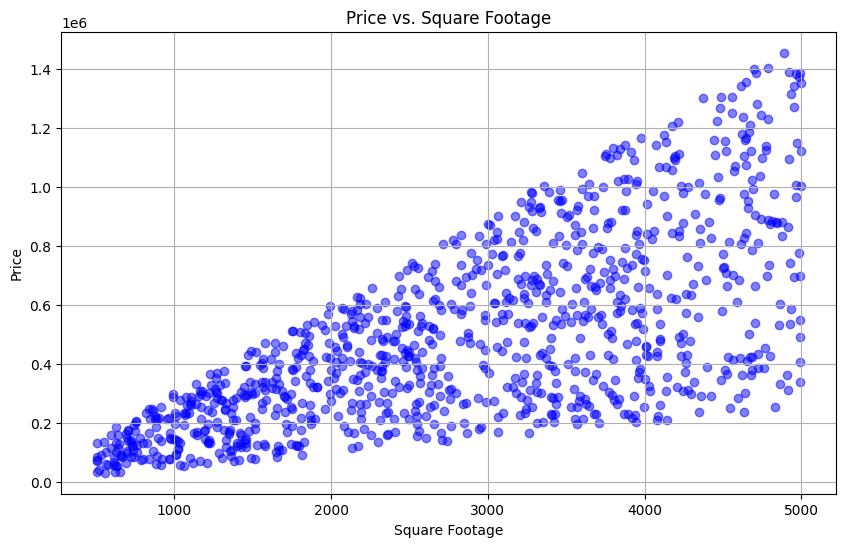


Updated DataFrame:
   Square_Feet          Price  Year_Built  Year_Renovated     Location  \
0         1360  232824.644831        1944            2015  CITY CENTER   
1         4272  760904.776482        1919            2020       SUBURB   
2         3592  845634.875917        1916            2020  CITY CENTER   
3          966  217071.273538        2018               0     NEAR BAY   
4         4926  742040.378690        1970               0     NEAR BAY   

   Price_per_sqft  Age_of_House Renovation_Status  
0      171.194592            81         Renovated  
1      178.114414           106         Renovated  
2      235.421736           109         Renovated  
3      224.711463             7     Not Renovated  
4      150.637511            55     Not Renovated  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('house_prices.csv')

print("Summary Statistics:")
print(df[['Price', 'Square_Feet']].describe())

df['Price_per_sqft'] = df['Price'] / df['Square_Feet']

plt.figure(figsize=(10, 6))
plt.scatter(df['Square_Feet'], df['Price'], alpha=0.5, color='blue')
plt.title("Price vs. Square Footage")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.grid(True)
plt.show()

print("\nUpdated DataFrame:")
print(df.head())
